# Régression linéaire avec TensorFlow 

Dans ce notebook, on va voir comment utiliser TensorFlow pour entraîner un modèle de régression linéaire sur le jeu de données de *Boston* de Sklearn. 
Le but sera de prédire  le prix des maisons en fonction de leurs caractéristiques. 

## Importation des packages

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD

## Importation des données

In [ ]:
boston = load_boston()
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(X, boston['target'], test_size=0.33, random_state=42)

std_scaler = StandardScaler().fit(X_train, y_train)

X_train  =  std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

X_train_tf = tf.convert_to_tensor(X_train)
X_test_tf = tf.convert_to_tensor(X_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Création de l'architecture

La fonction `Dense` nous permet d'initialiser les poids de notre régression linéaire et d'appliquer une multiplication matricielle entre nos poids et nos exemples. 

Pour plus d'informatons, n'hésitez pas à lire la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In [ ]:
def linear_regression(input):
  model = Sequential([Dense(input)])

  return model

Initialiser notre modèle.

In [ ]:
rl_model = linear_regression(1)

Prédire notre jeu d'entraînement.

In [ ]:
prediction = rl_model(X_train_tf)

In [ ]:
mean_absolute_error(prediction, y_train)

22.970796443443405

## Définir la fonction de coût

Nous allons maintenant initialiser notre fonction de coût.

Vous pouvez trouver les différentes fonctions de coût implémenter par TensorFlow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [ ]:
loss = MeanAbsoluteError()

## Définir l'algorithme d'optimisation

Nous allons maintenant initialiser notre fonction d'optimisation qui va mettre à jour nos poids. Il existe des améliorations du gradient descent censé être plus rapide et performant. 

Vous pouvez trouver les différents algorithmes d'optimisation implémenter par Tensorflow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

In [ ]:
opt = SGD(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Définir la fonction d'entraînement

Nous allons maintenant initialiser la fonction d'entraînement de notre modèle en utilisant notre modèle, notre fonction de coût et notre algorithme d'optimisation.

In [ ]:
def step(model, opt, loss, X, y):

  # garder la trace de nos gradients
  with tf.GradientTape() as tape:
    # faire une prédiction en utilisant le modèle, puis calculer le coût
    pred = model(X)
    train_loss = loss(y, pred)
    
    # calculer les gradients en utilisant tape 
    grads = tape.gradient(train_loss, model.trainable_variables)

  # mettre à jour les poids du modèle
  opt.apply_gradients(zip(grads, model.trainable_variables))
 
  return model, train_loss

## Entraîner notre modèle

Il est maintenant temps d'entraîner notre modèle

In [ ]:
epoch = 1000
history_train = []
history_test = []

for e in range(epoch) : 

  # mise à jour des poids
  rl_model, train_loss = step(rl_model, opt, loss, X_train_tf, y_train_tf)

  # prédiction sur le jeu de test
  test_pred = rl_model(X_test_tf)
  test_loss = mean_absolute_error(test_pred, y_test)

  # sauvegarde des coûts
  history_train = np.append(history_train, train_loss)
  history_test = np.append(history_test, test_loss)

  print('train_loss : '+str(np.squeeze(train_loss))+ ' test_loss : '+str(test_loss))


train_loss : 22.970797 test_loss : 21.28858233343609
train_loss : 22.960796 test_loss : 21.27858234966497
train_loss : 22.950796 test_loss : 21.268582370154512
train_loss : 22.940798 test_loss : 21.258582398964613
train_loss : 22.930796 test_loss : 21.248582440668233
train_loss : 22.920795 test_loss : 21.23858245631713
train_loss : 22.910795 test_loss : 21.228582477721265
train_loss : 22.900797 test_loss : 21.218582510591265
train_loss : 22.890797 test_loss : 21.20858254805653
train_loss : 22.880798 test_loss : 21.19858256312544
train_loss : 22.870796 test_loss : 21.188582583101923
train_loss : 22.860796 test_loss : 21.178582620745644
train_loss : 22.850796 test_loss : 21.168582653303343
train_loss : 22.840797 test_loss : 21.158582670915266
train_loss : 22.830795 test_loss : 21.148582690356374
train_loss : 22.820797 test_loss : 21.138582707477543
train_loss : 22.810797 test_loss : 21.128582723617193
train_loss : 22.800797 test_loss : 21.118582743950586
train_loss : 22.790796 test_loss 

Visualisation de l'évolution du coût pendant l'entraînement. 

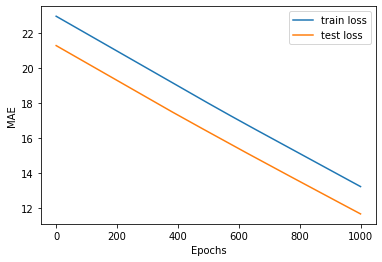

In [ ]:
plt.plot(np.arange(epoch), history_train, label='train loss')
plt.plot(np.arange(epoch), history_test, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Sauvegarde du modèle

Maintenant que notre modèle est entraîné, il est temps de le sauvegarder.

In [ ]:
rl_model.save_weights('linear_regression')

Initalisons à nouveau notre modèlre à random.

In [ ]:
rl_model = linear_regression(1)

In [ ]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

22.97079646114197

Nous pouvons revenir à nos poids entraîner en charger nos précédens poids.

In [ ]:
rl_model.load_weights('linear_regression')

In [ ]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

13.128006919928355